In [1]:
from yugiquery import *
header('Rush Duel')

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Rush Duel - Execution started 04/03/2023 00:56 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

---

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch online data](#Fetch-online-data)
    *   [1.2  Merge data](#Merge-data)
*   [2  Check changes](#Check-changes)
    *   [2.1  Load previous data](#Load-previous-data)
    *   [2.2  Generate changelog](#Generate-changelog)
    *   [2.3  Save data](#Save-data)
*   [3  Data visualization](#Data-visualization)
    *   [3.1  Card type](#Card-type)
    *   [3.2  Monsters](#Monsters)
        *   [3.2.1  Attribute](#Attribute)
        *   [3.2.2  Primary type](#Primary-type)
            *   [3.2.2.1  Has effect discrimination](#Has-effect-discrimination)
            *   [3.2.2.2  By attribute](#By-attribute)
        *   [3.2.3  Monster type](#Monster-type)
            *   [3.2.3.1  By Attribute](#By-Attribute)
            *   [3.2.3.2  By primary type](#By-primary-type)
        *   [3.2.4  Effect type](#Effect-type)
        *   [3.2.5  ATK](#ATK)
        *   [3.2.6  DEF](#DEF)
        *   [3.2.7  Maximum mode](#Maximum-mode)
            *   [3.2.7.1  MAXIMUM ATK](#MAXIMUM-ATK)
        *   [3.2.8  Level/Rank](#Level/Rank)
            *   [3.2.8.1  ATK statistics](#ATK-statistics)
            *   [3.2.8.2  DEF statistics](#DEF-statistics)
    *   [3.3  Spell & Trap](#Spell-&-Trap)
        *   [3.3.1  Properties](#Properties)
    *   [3.4  Archseries](#Archseries)
        *   [3.4.1  By card type](#By-card-type)
        *   [3.4.2  By primary type](#By-primary-type)
        *   [3.4.3  By monster type](#By-monster-type)
        *   [3.4.4  By property](#By-property)
    *   [3.5  Legend](#Legend)
        *   *   [3.5.0.1  By card type](#By-card-type)
            *   [3.5.0.2  By Attribute](#By-Attribute)
            *   [3.5.0.3  By primary type](#By-primary-type)
            *   [3.5.0.4  By monster type](#By-monster-type)
    *   [3.6  Artworks](#Artworks)
        *   [3.6.1  By card type](#By-card-type)
        *   [3.6.2  By primary type](#By-primary-type)
    *   [3.7  Errata](#Errata)
        *   [3.7.1  By card type](#By-card-type)
        *   [3.7.2  By primary type](#By-primary-type)
        *   [3.7.3  By artwork](#By-artwork)
*   [4  Epilogue](#Epilogue)
    *   [4.1  HTML export](#HTML-export)
<!--     *   [4.2  Git](#Git) -->

# Data aquisition

## Fetch online data

In [2]:
# Timestamp
timestamp = pd.Timestamp.now()

In [3]:
# Fetch rush cards
rush_df = fetch_rush()

# Fetch errata
errata_df = fetch_errata()

1431 results


4978 results


## Merge data

In [4]:
rush_df = merge_errata(rush_df, errata_df)
print('Data merged')

Data merged

# Check changes

## Load previous data

In [5]:
# Get list of files
files_list = sorted(glob.glob('../data/all_rush_*.csv'), key=os.path.getctime, reverse=True)
# Get second newest file if exist
if files_list:
    latest_file = files_list[0]
    # Load csv avoiding converting "NA" to NaN
    previous_df = pd.read_csv(latest_file, dtype=object, keep_default_na=False, na_values=[''])
    # Correct tuples
    tuple_cols = ['Effect type', 'Archseries', 'Artwork', 'Errata', 'Legend', 'Maximum mode']
    for col in tuple_cols:
        previous_df[col] = previous_df[col].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(rush_df[previous_df.columns.intersection(rush_df.columns)].dtypes.to_dict())
    previous_ts = pd.to_datetime(os.path.basename(latest_file).split('_')[-1].split('.csv')[0])
    print('File loaded')
else:
    previous_df = None
    print('No older files')

File loaded

## Generate changelog

In [6]:
if previous_df is None:
    changelog = None
    print('Skipped')
else:
    changelog = generate_changelog(previous_df, rush_df, col = 'Name')
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(f'../data/rush_changelog_{previous_ts.isoformat(timespec="minutes")}_{timestamp.isoformat(timespec="minutes")}.csv', index = True)
        print('Changelog saved')

No changes

## Save data

In [7]:
if changelog is not None and changelog.empty:
    print('No changes. New data not saved')
else:
    rush_df.to_csv(f'../data/all_rush_{timestamp.isoformat(timespec="minutes")}.csv', index=False)
    print('Data saved')

No changes. New data not saved

# Data visualization

In [8]:
rush_df

,Name,Card type,Property,Archseries,Legend,Maximum mode,Attribute,Primary type,Monster type,Effect type,DEF,ATK,MAXIMUM ATK,Level/Rank,Page name,Page URL,Artwork,Modification date,Errata
0,1-Up,Trap Card,Normal Trap Card,NaN,False,False,NaN,NaN,NaN,"(Effect,)",NaN,NaN,NaN,NaN,1-Up,https://yugipedia.com/wiki/1-Up,NaN,2022-09-18 19:47:54,NaN
1,300 Light-Year Red Cloak,Spell Card,Normal Spell Card,"(Cosmic Urban Legend,)",False,False,NaN,NaN,NaN,"(Effect,)",NaN,NaN,NaN,NaN,300 Light-Year Red Cloak,https://yugipedia.com/wiki/300_Light-Year_Red_...,NaN,2022-11-17 12:07:53,NaN
2,7 Chance,Trap Card,Normal Trap Card,NaN,False,False,NaN,NaN,NaN,"(Effect,)",NaN,NaN,NaN,NaN,7 Chance,https://yugipedia.com/wiki/7_Chance,NaN,2022-12-10 20:50:09,NaN
3,Abare Ushioni,Monster Card,NaN,NaN,False,False,EARTH,Effect Monster,Beast-Warrior,"(Effect,)",1200,1200,NaN,4,Abare Ushioni (Rush Duel),https://yugipedia.com/wiki/Abare_Ushioni_(Rush...,NaN,2022-11-17 12:09:14,"(Any,)"
4,Abyss Flash,Spell Card,Normal Spell Card,NaN,False,False,NaN,NaN,NaN,"(Effect,)",NaN,NaN,NaN,NaN,Abyss Flash,https://yugipedia.com/wiki/Abyss_Flash,NaN,2023-03-01 13:31:46,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,Zap Zap Octospark,Monster Card,NaN,NaN,False,False,WATER,Effect Monster,Thunder,"(Effect,)",800,1600,NaN,6,Zap Zap Octospark,https://yugipedia.com/wiki/Zap_Zap_Octospark,NaN,2023-01-12 19:07:05,NaN
1427,Zeptron,Monster Card,NaN,"(Tron (series),)",False,False,LIGHT,Effect Monster,Cyberse,"(Effect,)",100,500,NaN,2,Zeptron,https://yugipedia.com/wiki/Zeptron,NaN,2023-01-03 23:12:53,NaN
1428,Zombie Carnival,Spell Card,Field Spell Card,NaN,False,False,NaN,NaN,NaN,"(Effect,)",NaN,NaN,NaN,NaN,Zombie Carnival,https://yugipedia.com/wiki/Zombie_Carnival,NaN,2023-01-05 23:00:01,NaN
1429,Zombie Fireworks,Spell Card,Normal Spell Card,NaN,False,False,NaN,NaN,NaN,"(Effect,)",NaN,NaN,NaN,NaN,Zombie Fireworks,https://yugipedia.com/wiki/Zombie_Fireworks,NaN,2022-10-20 06:57:57,NaN


## Card type

In [9]:
rush_df['Card type'].nunique()

3

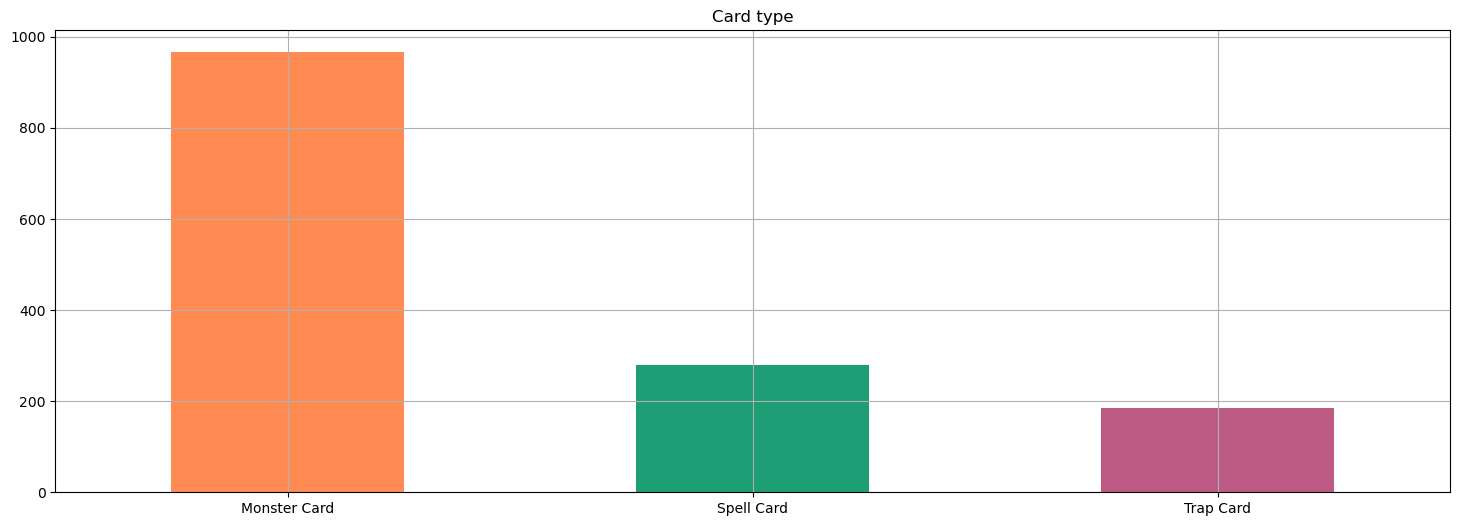

In [10]:
card_type_colors = [colors_dict[i] for i in rush_df['Card type'].value_counts().index]
rush_df['Card type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = card_type_colors, title = 'Card type')
plt.show()

## Monsters

### Attribute

In [11]:
print('Total number of attributes:', rush_df['Attribute'].nunique())

Total number of attributes:

6

In [12]:
rush_df.drop(columns=['Card type']).groupby('Attribute').nunique()

,Name,Property,Archseries,Legend,Maximum mode,Primary type,Monster type,Effect type,DEF,ATK,MAXIMUM ATK,Level/Rank,Page name,Page URL,Artwork,Modification date,Errata
Attribute,,,,,,,,,,,,,,,,,
DARK,216,0,27,2,2,3,24,5,28,32,2,11,216,216,3,216,4
EARTH,206,0,18,2,2,3,16,4,28,30,2,10,206,206,2,206,4
FIRE,116,0,15,2,2,3,21,5,24,28,3,10,116,116,2,116,3
LIGHT,258,0,31,2,2,3,24,5,27,32,2,10,258,258,2,258,4
WATER,99,0,12,2,1,3,21,2,23,24,0,9,99,99,1,99,2
WIND,71,0,10,2,1,3,14,2,20,23,0,8,71,71,2,71,3


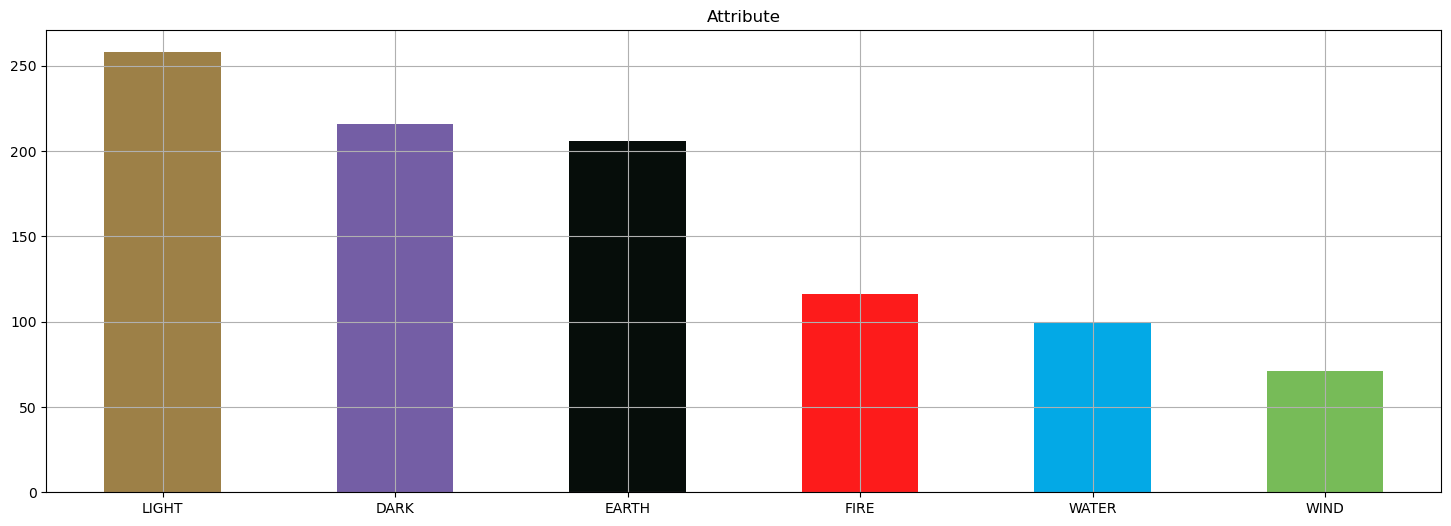

In [13]:
attribute_colors = [colors_dict[i] for i in rush_df['Attribute'].value_counts().index]
rush_df['Attribute'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = attribute_colors, title = 'Attribute')
plt.show()

### Primary type

In [14]:
print('Total number of primary types:', rush_df['Primary type'].nunique())

Total number of primary types:

3

In [15]:
rush_df.drop(columns=['Card type']).groupby('Primary type').nunique()

,Name,Property,Archseries,Legend,Maximum mode,Attribute,Monster type,Effect type,DEF,ATK,MAXIMUM ATK,Level/Rank,Page name,Page URL,Artwork,Modification date,Errata
Primary type,,,,,,,,,,,,,,,,,
Effect Monster,564,0,55,2,2,6,24,5,28,29,5,9,564,564,3,563,3
Fusion Monster,84,0,26,1,1,6,20,3,19,19,0,9,84,84,2,84,4
Normal Monster,318,0,43,2,1,6,24,0,27,26,0,8,318,318,2,317,4


#### Has effect discrimination

In [16]:
has_effect = rush_df['Primary type'].where(rush_df['Effect type'].notna()).value_counts().rename('Effect')
no_effect = rush_df['Primary type'].where(rush_df['Effect type'].isna()).value_counts().rename('No Effect')
effect = pd.concat([has_effect,no_effect], axis=1).fillna(0).astype(int)
effect

,Effect,No Effect
Effect Monster,563,1
Fusion Monster,80,4
Normal Monster,0,318


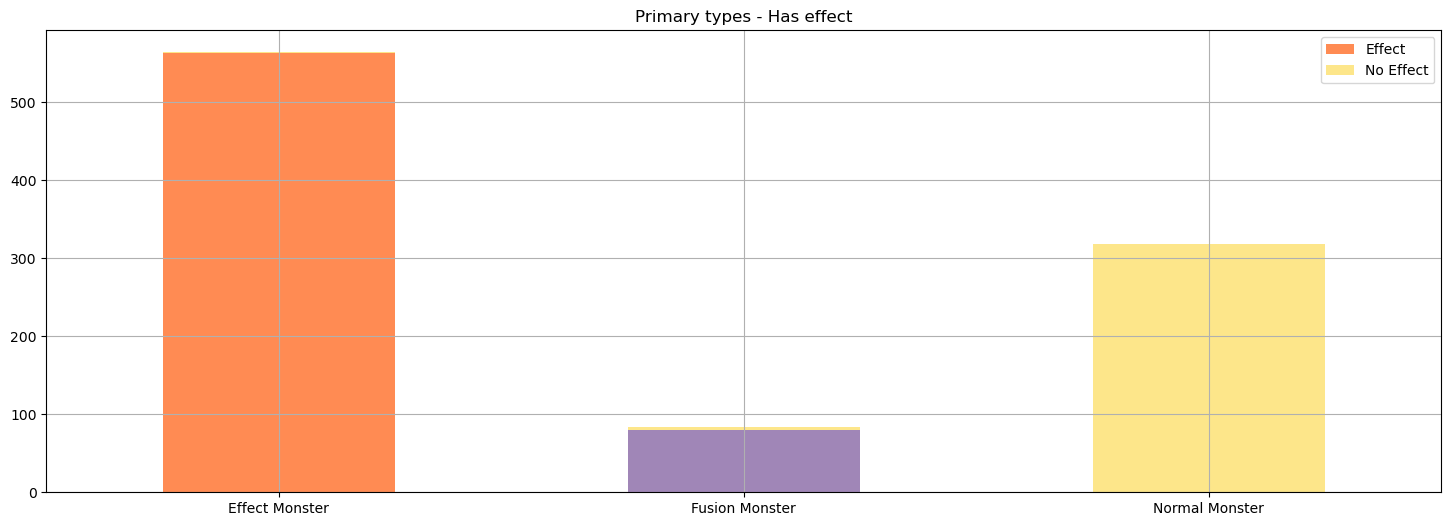

In [17]:
monster_type_colors = {'No Effect': colors_dict['Normal Monster'], 'Effect': [colors_dict[i] for i in effect.index]}
effect.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0,  legend=True, color = monster_type_colors, title = 'Primary types - Has effect')
# plt.yscale('log')
plt.show()

Obs: Effect monster can show as no effect if it is not released yet

#### By attribute

In [18]:
primmary_crosstab = pd.crosstab(rush_df['Primary type'],rush_df['Attribute'])
primmary_crosstab

Attribute,DARK,EARTH,FIRE,LIGHT,WATER,WIND
Primary type,,,,,,
Effect Monster,140,108,67,154,58,37
Fusion Monster,23,16,11,26,5,3
Normal Monster,53,82,38,78,36,31


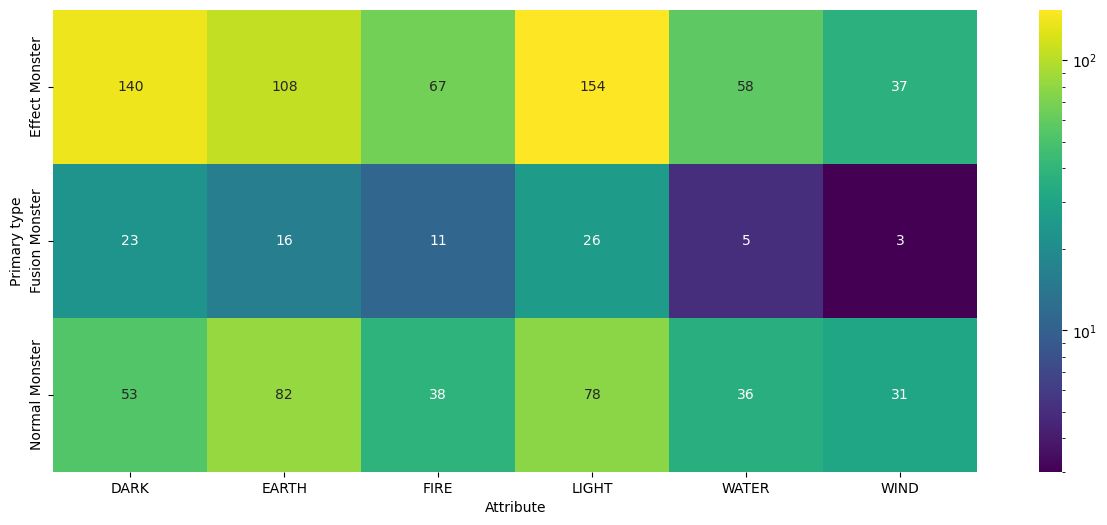

In [19]:
plt.figure(figsize = (16,6))
sns.heatmap(primmary_crosstab, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

### Monster type

In [20]:
print('Total number of monster types:', rush_df['Monster type'].nunique())

Total number of monster types:

29

In [21]:
rush_df.drop(columns=['Card type']).groupby('Monster type').nunique()

,Name,Property,Archseries,Legend,Maximum mode,Attribute,Primary type,Effect type,DEF,ATK,MAXIMUM ATK,Level/Rank,Page name,Page URL,Artwork,Modification date,Errata
Monster type,,,,,,,,,,,,,,,,,
Aqua,40,0,4,2,1,4,2,1,10,15,0,7,40,40,2,40,1
Beast,48,0,3,2,1,6,3,1,18,24,0,8,48,48,2,48,3
Beast-Warrior,33,0,3,2,1,4,3,2,16,17,0,8,33,33,1,33,3
Celestial Warrior,7,0,3,1,1,2,1,2,5,6,0,1,7,7,0,7,0
Cyberse,22,0,2,1,2,4,3,2,6,17,1,10,22,22,0,22,0
Cyborg,5,0,1,1,1,1,1,1,1,2,0,1,5,5,0,5,0
Dinosaur,20,0,2,1,2,4,3,3,12,15,1,9,20,20,0,20,2
Dragon,88,0,6,2,2,6,3,3,23,29,1,10,88,88,1,88,4
Fairy,35,0,5,2,1,6,2,3,15,14,0,8,35,35,1,35,1


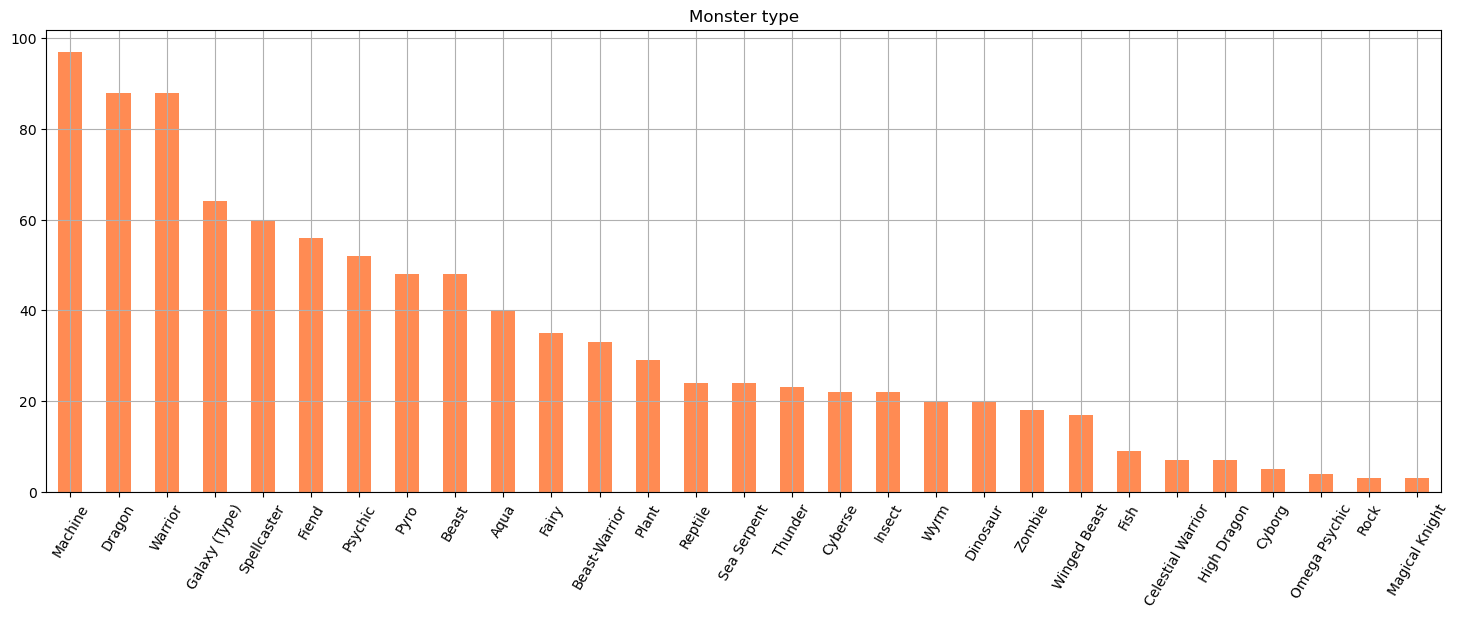

In [22]:
monster_type_colors = colors_dict['Monster Card']
rush_df['Monster type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=60, color = monster_type_colors, title = 'Monster type')
plt.show()

#### By Attribute

In [23]:
monster_crosstab = pd.crosstab(rush_df['Monster type'],rush_df['Attribute'], dropna=False)
monster_crosstab

Attribute,DARK,EARTH,FIRE,LIGHT,WATER,WIND
Monster type,,,,,,
Aqua,3,0,1,11,25,0
Beast,5,20,9,8,2,4
Beast-Warrior,13,17,2,0,0,1
Celestial Warrior,2,0,0,5,0,0
Cyberse,2,0,1,18,1,0
Cyborg,0,0,0,5,0,0
Dinosaur,1,11,2,6,0,0
Dragon,18,13,11,30,4,12
Fairy,12,2,2,14,2,3


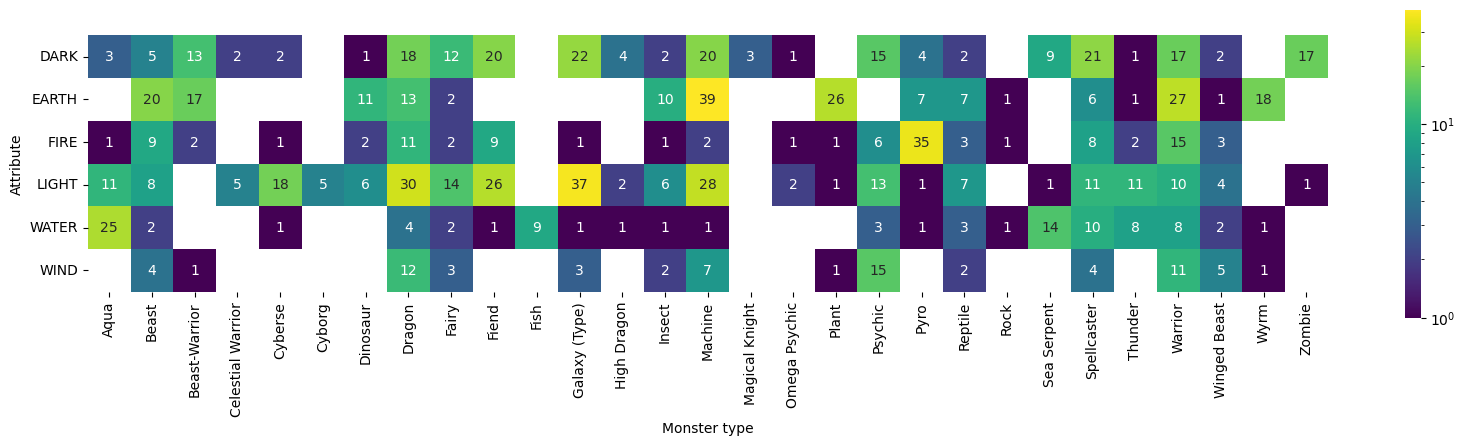

In [24]:
plt.figure(figsize = (20,4))
sns.heatmap(monster_crosstab[monster_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

#### By primary type

In [25]:
monster_crosstab_b = pd.crosstab(rush_df['Monster type'],rush_df['Primary type'], dropna=False)
monster_crosstab_b

Primary type,Effect Monster,Fusion Monster,Normal Monster
Monster type,,,
Aqua,18,0,22
Beast,19,2,27
Beast-Warrior,17,2,14
Celestial Warrior,0,7,0
Cyberse,16,2,4
Cyborg,0,5,0
Dinosaur,11,1,8
Dragon,51,5,32
Fairy,23,0,12


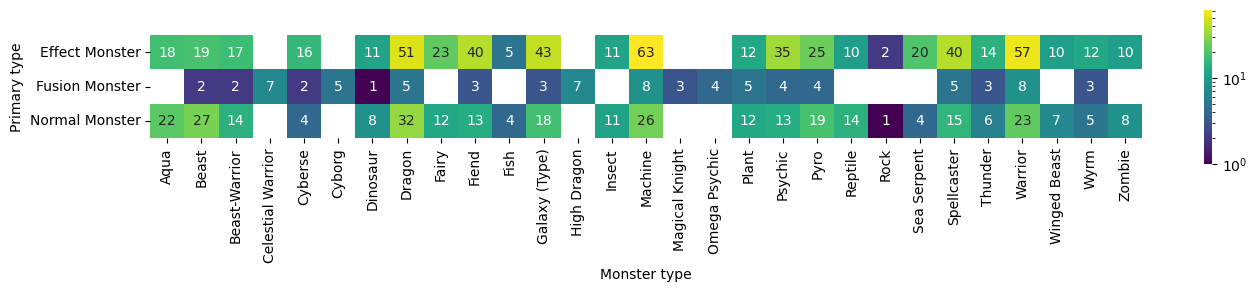

In [26]:
plt.figure(figsize = (16,2))
sns.heatmap(monster_crosstab_b[monster_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = mc.LogNorm())
plt.show()

### Effect type

In [27]:
print('Total number of effect types:', rush_df['Effect type'].explode().nunique())

Total number of effect types:

4

In [28]:
rush_df[rush_df['Effect type'].notna()].drop(columns=['Card type']).explode('Effect type').groupby('Effect type').nunique()

,Name,Property,Archseries,Legend,Maximum mode,Attribute,Primary type,Monster type,DEF,ATK,MAXIMUM ATK,Level/Rank,Page name,Page URL,Artwork,Modification date,Errata
Effect type,,,,,,,,,,,,,,,,,
Continuous Effect,50,0,14,2,2,5,2,17,19,23,4,10,50,50,1,50,4
Effect,1033,4,67,2,2,6,2,24,29,31,3,10,1033,1033,3,1031,4
Multi-Choice Effect,24,0,9,1,1,4,1,5,8,8,0,3,24,24,1,24,0
Summoning condition,12,0,6,2,2,4,1,8,3,7,5,4,12,12,0,12,1


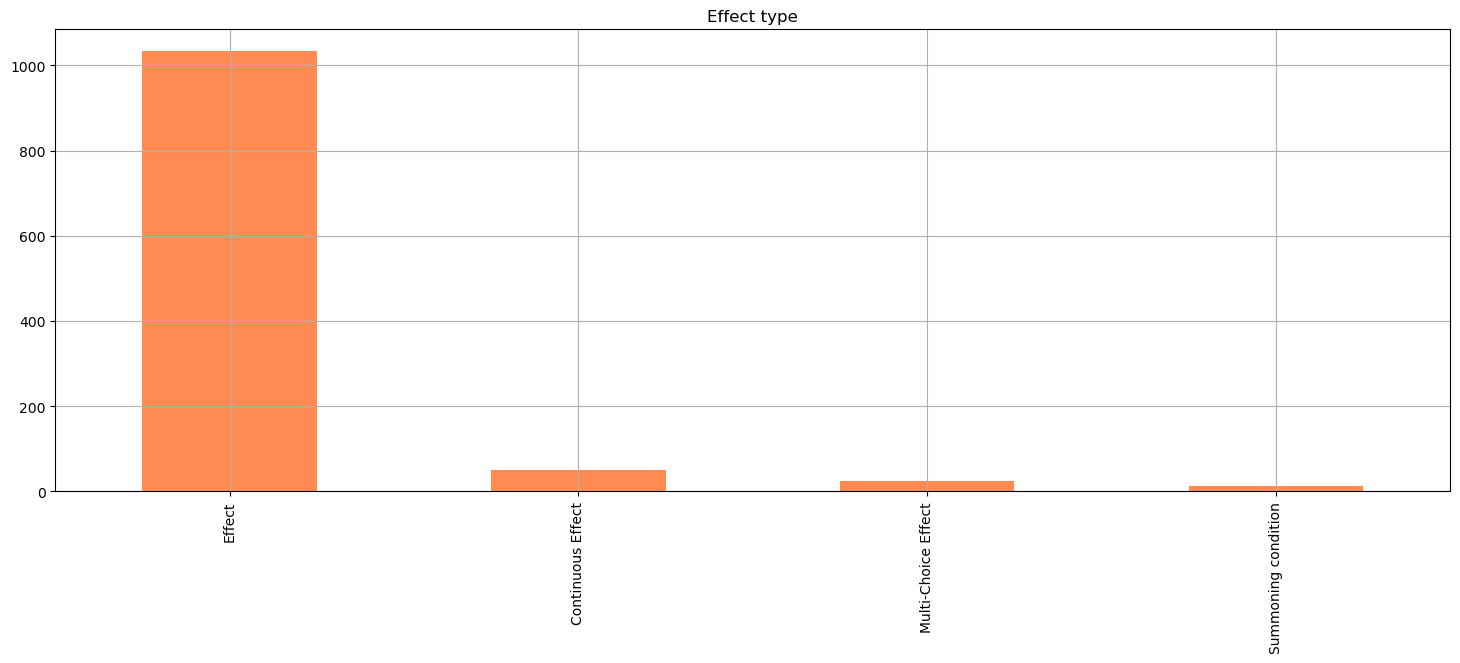

In [29]:
monster_effect_colors = colors_dict['Effect Monster']
rush_df['Effect type'].explode('Effect type').value_counts().plot.bar(figsize = (18,6), grid = True, color = monster_effect_colors, title='Effect type')
# plt.yscale('log')
plt.show()

### ATK

In [30]:
print('Total number of ATK values:', rush_df['ATK'].nunique())

Total number of ATK values:

35

In [31]:
rush_df.drop(columns=['Card type']).groupby('ATK').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Property,Archseries,Legend,Maximum mode,Attribute,Primary type,Monster type,Effect type,DEF,MAXIMUM ATK,Level/Rank,Page name,Page URL,Artwork,Modification date,Errata
ATK,,,,,,,,,,,,,,,,,
0,70,0,22,2,1,6,3,17,2,17,0,8,70,70,1,70,2
100,22,0,9,1,1,6,2,13,1,10,0,5,22,22,1,22,0
200,13,0,3,1,1,4,3,10,1,10,0,5,13,13,0,13,1
300,14,0,5,1,1,4,2,11,1,7,0,4,14,14,1,14,1
400,12,0,7,1,1,6,2,8,1,7,0,5,12,12,0,12,1
500,34,0,17,1,2,6,2,18,2,11,0,5,34,34,2,34,1
600,14,0,8,1,2,5,2,10,1,6,0,4,14,14,0,14,0
700,16,0,6,1,1,5,2,9,1,11,0,4,16,16,0,16,0
800,41,0,17,2,2,6,2,19,2,15,0,5,41,41,2,41,2


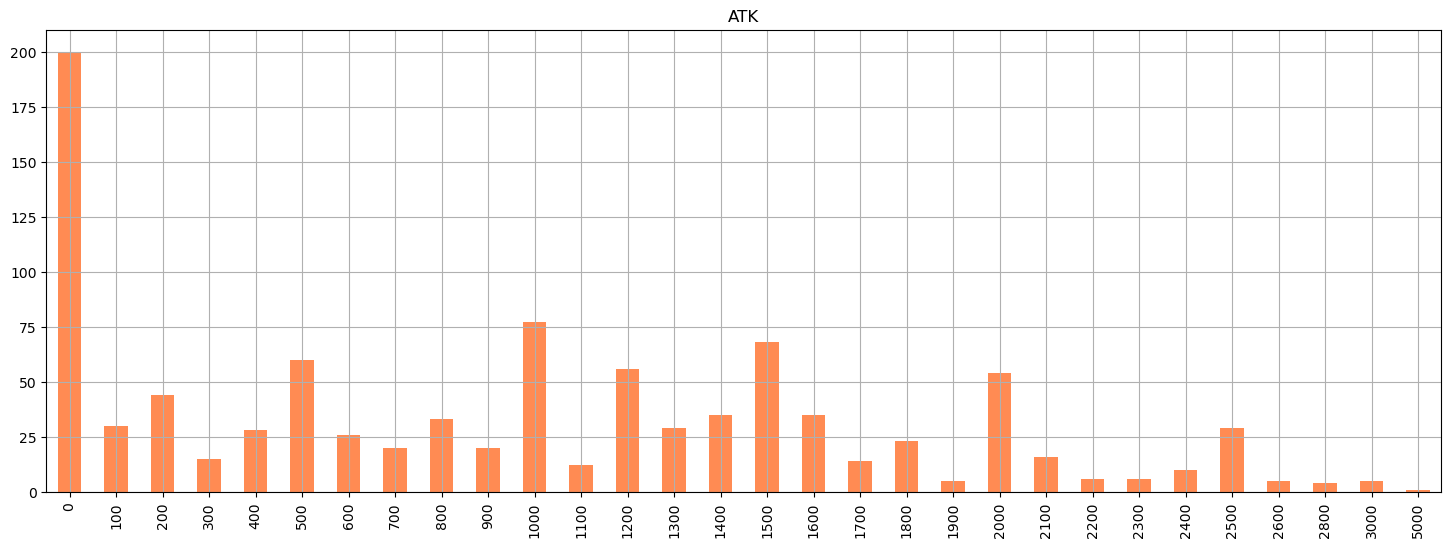

In [32]:
atk_colors = colors_dict['Monster Card']
rush_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = atk_colors, title = 'ATK')
plt.show()

### DEF

In [33]:
print('Total number of DEF values:', rush_df['DEF'].nunique())

Total number of DEF values:

30

In [34]:
rush_df.drop(columns=['Card type']).groupby('DEF').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Property,Archseries,Legend,Maximum mode,Attribute,Primary type,Monster type,Effect type,ATK,MAXIMUM ATK,Level/Rank,Page name,Page URL,Artwork,Modification date,Errata
DEF,,,,,,,,,,,,,,,,,
0,200,0,31,2,2,6,3,23,4,25,5,10,200,200,2,200,2
100,30,0,10,1,1,5,2,11,1,17,0,7,30,30,1,30,1
200,44,0,10,2,1,5,3,13,1,21,0,8,44,44,2,44,2
300,15,0,6,1,1,5,2,11,1,7,0,4,15,15,0,15,0
400,28,0,10,1,1,6,2,13,1,13,0,6,28,28,0,28,1
500,60,0,15,1,1,6,2,19,2,15,0,8,60,60,1,60,2
600,26,0,9,2,1,6,2,14,2,16,0,7,26,26,0,26,3
700,20,0,3,1,1,6,2,12,1,12,0,5,20,20,0,20,2
800,33,0,11,2,1,6,2,18,2,15,0,6,33,33,2,33,2


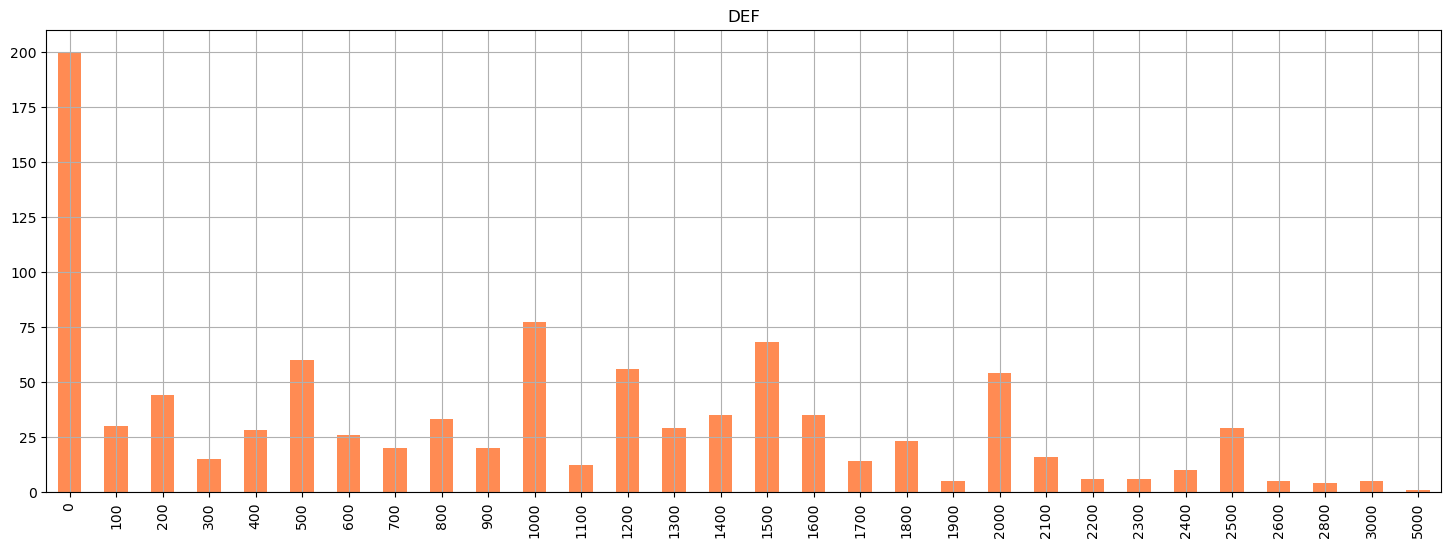

In [35]:
def_colors = colors_dict['Monster Card']
rush_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = def_colors, title = 'DEF')
plt.show()

### Maximum mode

In [36]:
print('Total cards requiring maximum mode:', rush_df['Maximum mode'].sum())

Total cards requiring maximum mode:

38

In [37]:
rush_df[rush_df['Maximum mode']]

,Name,Card type,Property,Archseries,Legend,Maximum mode,Attribute,Primary type,Monster type,Effect type,DEF,ATK,MAXIMUM ATK,Level/Rank,Page name,Page URL,Artwork,Modification date,Errata
6,Abyssal Dragon Lord Abyss Poseidra,Monster Card,NaN,NaN,False,True,DARK,Effect Monster,Sea Serpent,"(Continuous Effect,)",0,2500,4000,10,Abyssal Dragon Lord Abyss Poseidra,https://yugipedia.com/wiki/Abyssal_Dragon_Lord...,NaN,2023-03-01 13:21:39,NaN
7,Abyssal Dragon Lord Abyss Poseidra [L],Monster Card,NaN,NaN,False,True,DARK,Effect Monster,Sea Serpent,"(Effect,)",0,2300,NaN,10,Abyssal Dragon Lord Abyss Poseidra (L),https://yugipedia.com/wiki/Abyssal_Dragon_Lord...,NaN,2023-03-01 13:23:22,NaN
8,Abyssal Dragon Lord Abyss Poseidra [R],Monster Card,NaN,NaN,False,True,DARK,Effect Monster,Sea Serpent,"(Continuous Effect,)",0,2400,NaN,10,Abyssal Dragon Lord Abyss Poseidra (R),https://yugipedia.com/wiki/Abyssal_Dragon_Lord...,NaN,2023-03-01 13:25:12,NaN
9,Abyssal Sea Dragon Abyss Kraken,Monster Card,NaN,NaN,False,True,DARK,Effect Monster,Sea Serpent,"(Continuous Effect,)",0,2500,4000,10,Abyssal Sea Dragon Abyss Kraken,https://yugipedia.com/wiki/Abyssal_Sea_Dragon_...,NaN,2023-03-01 13:27:55,NaN
10,Abyssal Sea Dragon Abyss Kraken [L],Monster Card,NaN,NaN,False,True,DARK,Effect Monster,Sea Serpent,"(Effect,)",0,2300,NaN,10,Abyssal Sea Dragon Abyss Kraken (L),https://yugipedia.com/wiki/Abyssal_Sea_Dragon_...,NaN,2023-03-01 13:28:55,NaN
11,Abyssal Sea Dragon Abyss Kraken [R],Monster Card,NaN,NaN,False,True,DARK,Effect Monster,Sea Serpent,"(Effect,)",0,2300,NaN,10,Abyssal Sea Dragon Abyss Kraken (R),https://yugipedia.com/wiki/Abyssal_Sea_Dragon_...,NaN,2023-03-01 13:29:40,NaN
158,Blaze Fiend Overlords Beelucitaroth,Monster Card,NaN,"(Blaze Fiend,)",False,True,FIRE,Effect Monster,Fiend,"(Continuous Effect, Summoning condition)",0,1200,3000,4,Blaze Fiend Overlords Beelucitaroth,https://yugipedia.com/wiki/Blaze_Fiend_Overlor...,NaN,2023-02-23 09:59:20,NaN
159,Blaze Fiend Overlords Beelucitaroth [L],Monster Card,NaN,"(Blaze Fiend,)",False,True,FIRE,Effect Monster,Fiend,"(Continuous Effect,)",0,1100,NaN,4,Blaze Fiend Overlords Beelucitaroth (L),https://yugipedia.com/wiki/Blaze_Fiend_Overlor...,NaN,2023-02-23 09:59:26,NaN
160,Blaze Fiend Overlords Beelucitaroth [R],Monster Card,NaN,"(Blaze Fiend,)",False,True,FIRE,Effect Monster,Fiend,"(Effect,)",0,1000,NaN,4,Blaze Fiend Overlords Beelucitaroth (R),https://yugipedia.com/wiki/Blaze_Fiend_Overlor...,NaN,2023-02-23 09:59:14,NaN
379,Doomblaze Despair,Trap Card,Normal Trap Card,"(Blaze Fiend,)",False,True,NaN,NaN,NaN,"(Effect,)",NaN,NaN,NaN,NaN,Doomblaze Despair,https://yugipedia.com/wiki/Doomblaze_Despair,NaN,2023-02-23 09:58:34,NaN


#### MAXIMUM ATK

In [38]:
print('Total number of MAXIMUM ATK values:', rush_df['MAXIMUM ATK'].nunique())

Total number of MAXIMUM ATK values:

5

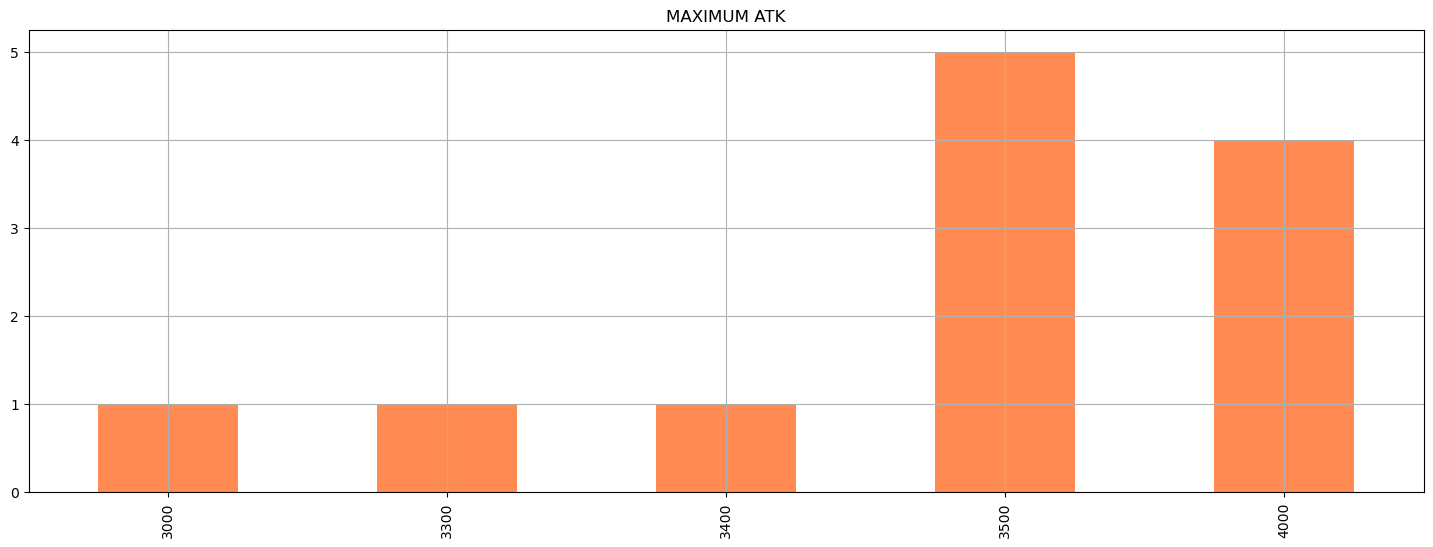

In [39]:
def_colors = colors_dict['Monster Card']
rush_df['MAXIMUM ATK'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = def_colors, title = 'MAXIMUM ATK')
plt.show()

##### By ATK

In [40]:
max_atk_crosstab = pd.crosstab(rush_df['ATK'],rush_df['MAXIMUM ATK'])
max_atk_crosstab

MAXIMUM ATK,3000,3300,3400,3500,4000
ATK,,,,,
1200,1,0,0,0,0
1500,0,1,0,0,0
1900,0,0,1,3,0
2000,0,0,0,1,1
2500,0,0,0,1,3


##### By DEF

In [41]:
max_def_crosstab = pd.crosstab(rush_df['DEF'],rush_df['MAXIMUM ATK'])
max_def_crosstab

MAXIMUM ATK,3000,3300,3400,3500,4000
DEF,,,,,
0,1,1,1,5,4


### Level/Rank

In [42]:
rush_df.drop(columns=['Card type']).groupby('Level/Rank').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Property,Archseries,Legend,Maximum mode,Attribute,Primary type,Monster type,Effect type,DEF,ATK,MAXIMUM ATK,Page name,Page URL,Artwork,Modification date,Errata
Level/Rank,,,,,,,,,,,,,,,,,
1,87,0,28,1,1,6,2,21,2,11,11,0,87,87,2,87,2
2,69,0,28,1,1,6,3,21,1,17,11,0,69,69,1,69,2
3,151,0,32,1,2,6,2,23,2,16,14,0,151,151,2,151,3
4,223,0,40,2,2,6,3,22,3,19,20,1,223,223,2,223,4
5,56,0,19,2,1,6,3,16,3,17,16,0,56,56,2,56,4
6,82,0,19,2,1,6,3,21,2,21,15,0,82,82,3,82,3
7,161,0,39,2,2,6,3,25,3,24,15,0,161,161,2,161,4
8,73,0,23,2,1,6,3,18,3,17,11,0,73,73,2,73,4
9,44,0,22,1,1,5,1,15,3,13,9,0,44,44,2,44,0


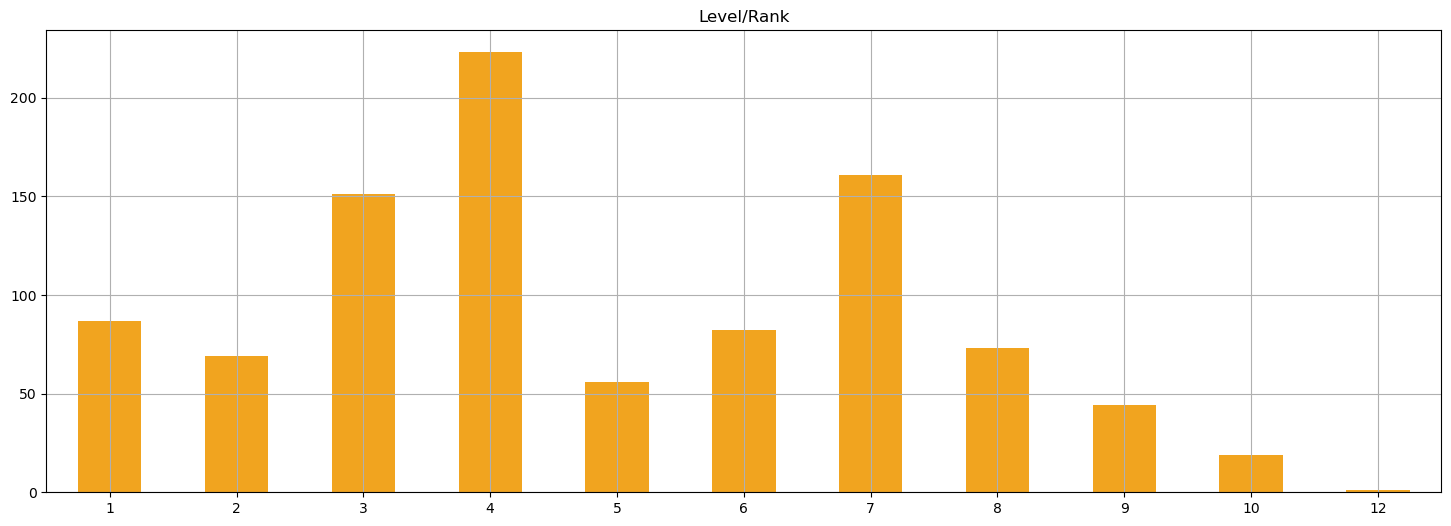

In [43]:
stars_colors = colors_dict['Level']
rush_df['Level/Rank'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color= stars_colors, title = 'Level/Rank')
plt.show()

#### ATK statistics

In [44]:
rush_df[['Level/Rank','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

ATK                                                           \
            count         mean         std     min     25%     50%     75%   
Level/Rank                                                                   
1            87.0   209.195402  286.369490     0.0     0.0   100.0   350.0   
2            69.0   589.855072  306.855459     0.0   400.0   600.0   800.0   
3           151.0   911.258278  329.756081     0.0   800.0  1000.0  1200.0   
4           223.0  1247.982063  333.805467     0.0  1100.0  1300.0  1500.0   
5            56.0  1464.285714  473.834866     0.0  1275.0  1600.0  1700.0   
6            82.0  1640.243902  511.077235     0.0  1600.0  1700.0  1800.0   
7           161.0  2190.062112  594.264774     0.0  2200.0  2400.0  2500.0   
8            73.0  2380.821918  551.426820     0.0  2400.0  2500.0  2500.0   
9            44.0  2850.000000  195.887960  2200.0  2800.0  2900.0  3000.0   
10           19.0  2310.526316  527.988570  1500.0  1950.0  2300.0  2500.0   
12            1.0  5000.000000         NaN  5000.0  5000.0  5000.0  5000.0   

                    
               max  
Level/Rank          
1           1000.0  
2           2000.0  
3           1300.0  
4           2000.0  
5           2500.0  
6           2500.0  
7           2700.0  
8           3500.0  
9           3300.0  
10          4000.0  
12          5000.0

#### DEF statistics

In [45]:
rush_df[['Level/Rank','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

DEF                                                           \
            count         mean         std     min     25%     50%     75%   
Level/Rank                                                                   
1            87.0   527.586207  565.416014     0.0     0.0   200.0  1000.0   
2            69.0   637.681159  438.949766     0.0   300.0   600.0   900.0   
3           151.0   607.284768  470.191356     0.0   100.0   600.0  1000.0   
4           223.0   622.869955  547.695266     0.0     0.0   600.0  1150.0   
5            56.0  1010.714286  671.951993     0.0   500.0  1200.0  1500.0   
6            82.0   950.000000  708.022808     0.0   500.0   850.0  1600.0   
7           161.0  1475.155280  729.385962     0.0  1300.0  1500.0  2000.0   
8            73.0  1678.082192  725.573829     0.0  1500.0  2000.0  2000.0   
9            44.0  2097.727273  731.194829     0.0  2000.0  2300.0  2500.0   
10           19.0   278.947368  837.044369     0.0     0.0     0.0     0.0   
12            1.0  5000.000000         NaN  5000.0  5000.0  5000.0  5000.0   

                    
               max  
Level/Rank          
1           1500.0  
2           2000.0  
3           1500.0  
4           2000.0  
5           3000.0  
6           2200.0  
7           2800.0  
8           3000.0  
9           3000.0  
10          2800.0  
12          5000.0

## Spell & Trap

### Properties

In [46]:
print('Total number of properties:', rush_df['Property'].nunique())

Total number of properties:

4

In [47]:
rush_df.drop(columns=['Card type']).groupby('Property').nunique()

,Name,Archseries,Legend,Maximum mode,Attribute,Primary type,Monster type,Effect type,DEF,ATK,MAXIMUM ATK,Level/Rank,Page name,Page URL,Artwork,Modification date,Errata
Property,,,,,,,,,,,,,,,,,
Equip Spell Card,17,7,1,1,0,0,0,1,0,0,0,0,17,17,0,17,0
Field Spell Card,31,11,1,1,0,0,0,1,0,0,0,0,31,31,1,31,2
Normal Spell Card,231,39,2,2,0,0,0,1,0,0,0,0,231,231,2,230,4
Normal Trap Card,186,35,2,2,0,0,0,1,0,0,0,0,186,186,2,186,2


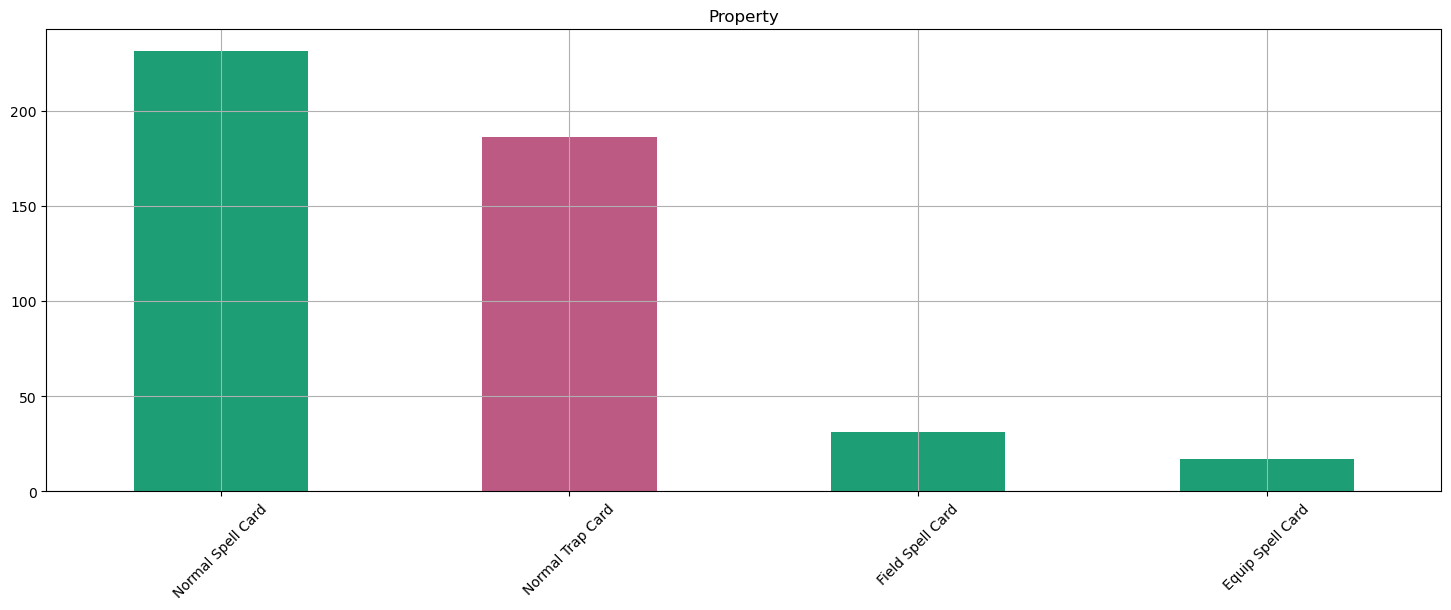

In [48]:
st_colors = [colors_dict[i] for i in rush_df[['Card type','Property']].value_counts().index.get_level_values(0)]
rush_df['Property'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = st_colors, title = 'Property')
plt.show()

## Archseries

In [49]:
exploded_archseries = rush_df.explode('Archseries')
print('Total number of Archseries:', exploded_archseries['Archseries'].nunique())

Total number of Archseries:

65

In [50]:
exploded_archseries.groupby('Archseries').nunique()

,Name,Card type,Property,Legend,Maximum mode,Attribute,Primary type,Monster type,Effect type,DEF,ATK,MAXIMUM ATK,Level/Rank,Page name,Page URL,Artwork,Modification date,Errata
Archseries,,,,,,,,,,,,,,,,,,
Arts Angel,5,1,0,1,1,1,2,1,1,4,4,0,4,5,5,0,5,0
Band Group,7,2,1,1,1,1,2,1,1,1,5,0,3,7,7,0,7,0
Baseball,14,3,3,1,1,1,2,2,1,3,7,0,2,14,14,0,14,0
Beast Gear,11,3,2,1,1,4,2,1,1,8,9,0,5,11,11,0,11,0
Blaze Fiend,13,3,2,1,2,1,1,1,4,2,7,2,2,13,13,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ultimate Flag,8,1,0,1,1,1,2,1,1,2,6,0,5,8,8,0,8,0
Umi (series),2,1,1,1,1,0,0,0,1,0,0,0,0,2,2,0,2,1
Voidvelgr,15,2,1,1,1,1,3,1,1,9,8,0,8,15,15,1,15,0


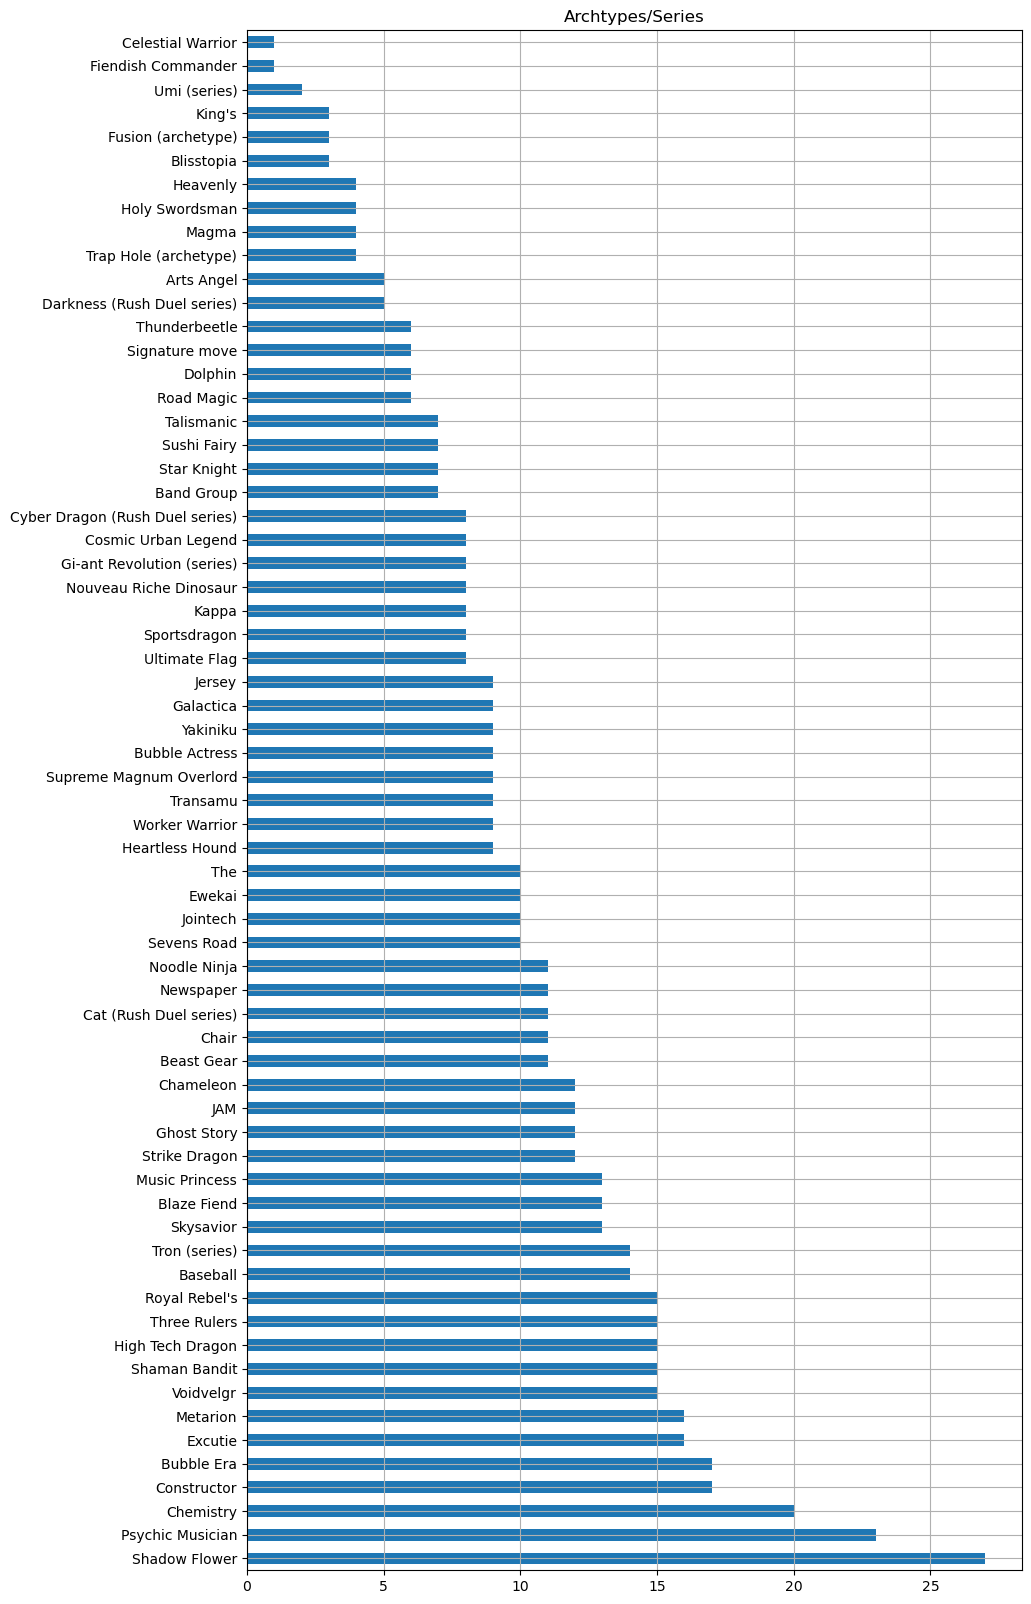

In [51]:
exploded_archseries['Archseries'].value_counts().plot.barh(figsize = (10,20), grid = True, title = 'Archtypes/Series')
plt.show()

### By card type

In [52]:
archseries_crosstab = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Card type'], margins = True)
archseries_crosstab

Card type,Monster Card,Spell Card,Trap Card,All
Archseries,,,,
Arts Angel,5,0,0,5
Band Group,5,2,0,7
Baseball,8,4,2,14
Beast Gear,9,1,1,11
Blaze Fiend,8,3,2,13
...,...,...,...,...
Umi (series),0,2,0,2
Voidvelgr,13,2,0,15
Worker Warrior,6,1,2,9


### By primary type

In [53]:
archseries_crosstab_b = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Primary type'], margins = True)
archseries_crosstab_b

Primary type,Effect Monster,Fusion Monster,Normal Monster,All
Archseries,,,,
Arts Angel,2,0,3,5
Band Group,4,0,1,5
Baseball,5,0,3,8
Beast Gear,6,0,3,9
Blaze Fiend,8,0,0,8
Bubble Actress,2,0,4,6
Bubble Era,6,0,3,9
Cat (Rush Duel series),5,2,4,11
Celestial Warrior,0,1,0,1


### By monster type

In [54]:
archseries_crosstab_d = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Monster type'], margins = True)
archseries_crosstab_d

Monster type,Aqua,Beast,Beast-Warrior,Celestial Warrior,Cyberse,Cyborg,Dinosaur,Dragon,Fairy,Fiend,Galaxy (Type),High Dragon,Insect,Machine,Magical Knight,Omega Psychic,Plant,Psychic,Pyro,Reptile,Sea Serpent,Spellcaster,Thunder,Warrior,Wyrm,Zombie,All
Archseries,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arts Angel,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
Band Group,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,5
Baseball,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,8
Beast Gear,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
Blaze Fiend,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
Bubble Actress,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
Bubble Era,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
Cat (Rush Duel series),0,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,11
Celestial Warrior,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### By property

In [55]:
archseries_crosstab_e = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Property'], margins = True)
archseries_crosstab_e

Property,Equip Spell Card,Field Spell Card,Normal Spell Card,Normal Trap Card,All
Archseries,,,,,
Band Group,0,0,2,0,2
Baseball,0,1,3,2,6
Beast Gear,0,1,0,1,2
Blaze Fiend,0,0,3,2,5
Blisstopia,0,3,0,0,3
Bubble Actress,0,2,1,0,3
Bubble Era,0,1,4,3,8
Chair,0,0,1,2,3
Chameleon,0,0,2,1,3


## Legend

In [56]:
print('Total number of Legend cards', rush_df['Legend'].sum())

Total number of Legend cards

52

In [57]:
rush_df[rush_df['Legend']]

,Name,Card type,Property,Archseries,Legend,Maximum mode,Attribute,Primary type,Monster type,Effect type,DEF,ATK,MAXIMUM ATK,Level/Rank,Page name,Page URL,Artwork,Modification date,Errata
5,Abyss Soldier,Monster Card,NaN,NaN,True,False,WATER,Effect Monster,Aqua,"(Effect,)",1300,1800,NaN,4,Abyss Soldier (Rush Duel),https://yugipedia.com/wiki/Abyss_Soldier_(Rush...,NaN,2022-11-17 12:14:35,"(Any,)"
26,Alien Shocktrooper,Monster Card,NaN,NaN,True,False,EARTH,Normal Monster,Reptile,NaN,800,1900,NaN,4,Alien Shocktrooper (Rush Duel),https://yugipedia.com/wiki/Alien_Shocktrooper_...,NaN,2022-10-10 09:06:48,NaN
66,Archfiend Soldier,Monster Card,NaN,NaN,True,False,DARK,Normal Monster,Fiend,NaN,1500,1900,NaN,4,Archfiend Soldier (Rush Duel),https://yugipedia.com/wiki/Archfiend_Soldier_(...,NaN,2022-12-21 09:03:19,"(Any,)"
105,Barrel Dragon,Monster Card,NaN,NaN,True,False,DARK,Effect Monster,Machine,"(Effect,)",2200,2600,NaN,7,Barrel Dragon (Rush Duel),https://yugipedia.com/wiki/Barrel_Dragon_(Rush...,"(Edited,)",2023-01-31 21:13:20,"(Any,)"
130,Behemoth the King of All Animals,Monster Card,NaN,NaN,True,False,EARTH,Effect Monster,Beast,"(Effect,)",1500,2700,NaN,7,Behemoth the King of All Animals (Rush Duel),https://yugipedia.com/wiki/Behemoth_the_King_o...,NaN,2023-03-04 00:04:18,"(Any,)"
169,Blue-Eyes White Dragon,Monster Card,NaN,NaN,True,False,LIGHT,Normal Monster,Dragon,NaN,2500,3000,NaN,8,Blue-Eyes White Dragon (Rush Duel),https://yugipedia.com/wiki/Blue-Eyes_White_Dra...,"(Alternate,)",2023-02-23 10:01:19,"(Name, Type)"
195,Buster Blader,Monster Card,NaN,NaN,True,False,EARTH,Effect Monster,Warrior,"(Continuous Effect,)",2300,2600,NaN,7,Buster Blader (Rush Duel),https://yugipedia.com/wiki/Buster_Blader_(Rush...,NaN,2023-03-03 17:03:00,"(Type,)"
208,Card Destruction,Spell Card,Normal Spell Card,NaN,True,False,NaN,NaN,NaN,"(Effect,)",NaN,NaN,NaN,NaN,Card Destruction (Rush Duel),https://yugipedia.com/wiki/Card_Destruction_(R...,NaN,2022-09-12 09:32:04,"(Type,)"
285,The Creator,Monster Card,NaN,NaN,True,False,LIGHT,Effect Monster,Thunder,"(Effect,)",3000,2300,NaN,8,The Creator (Rush Duel),https://yugipedia.com/wiki/The_Creator_(Rush_D...,NaN,2022-09-21 05:55:48,"(Any,)"
313,Cyber-Tech Alligator,Monster Card,NaN,NaN,True,False,WIND,Normal Monster,Machine,NaN,1600,2500,NaN,5,Cyber-Tech Alligator (Rush Duel),https://yugipedia.com/wiki/Cyber-Tech_Alligato...,NaN,2022-09-21 05:31:31,"(Name,)"


#### By card type

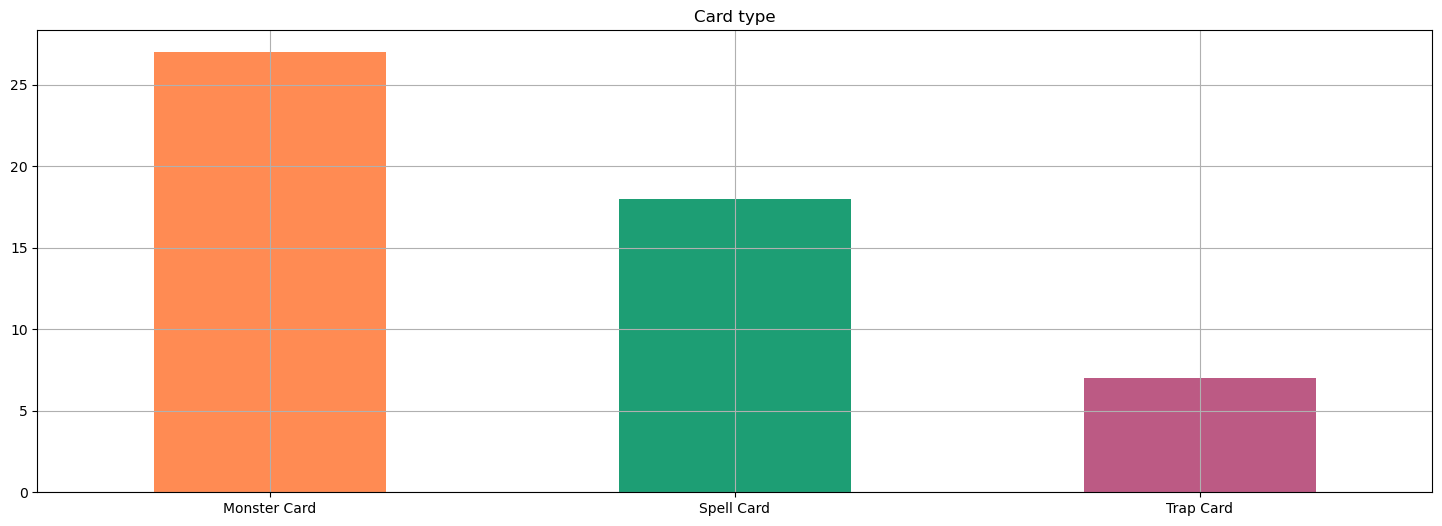

In [58]:
card_type_colors = [colors_dict[i] for i in rush_df[rush_df['Legend']]['Card type'].value_counts().index]
rush_df[rush_df['Legend']]['Card type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = card_type_colors, title = 'Card type')
plt.show()

#### By Attribute

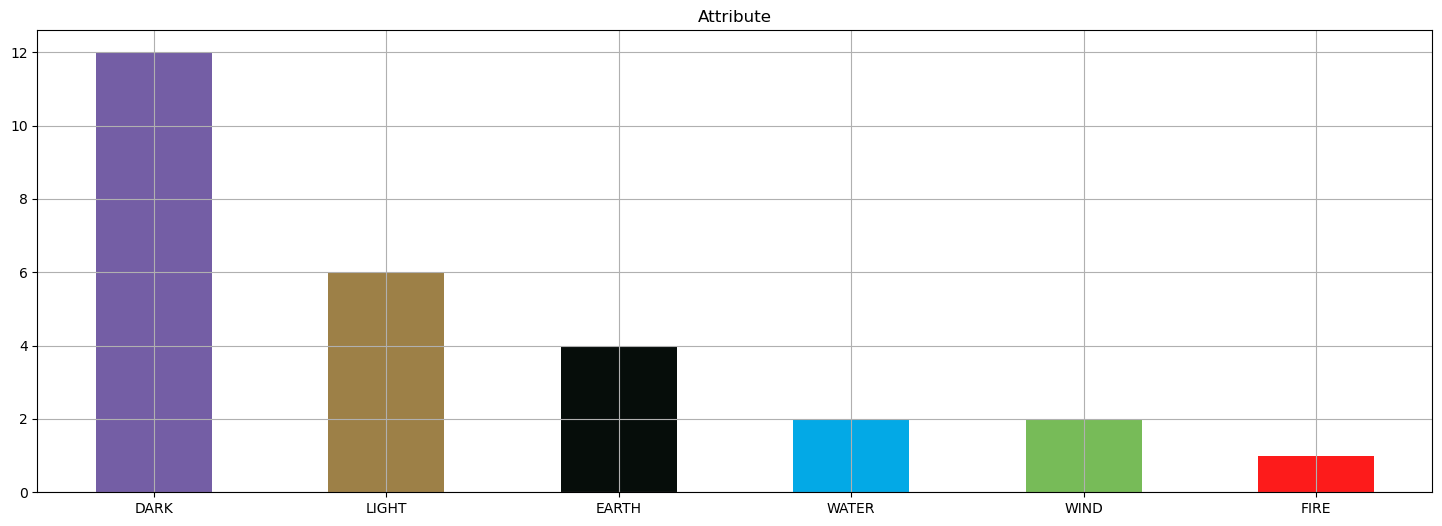

In [59]:
attribute_colors = [colors_dict[i] for i in rush_df[rush_df['Legend']]['Attribute'].value_counts().index]
rush_df[rush_df['Legend']]['Attribute'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = attribute_colors, title = 'Attribute')
plt.show()

#### By primary type

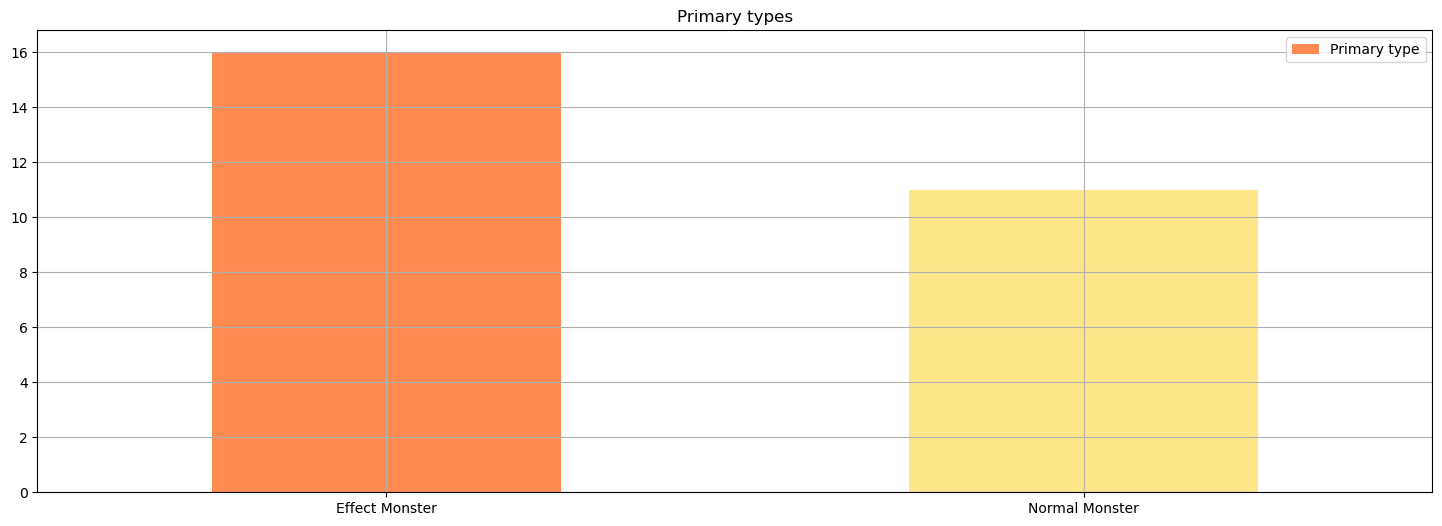

In [60]:
monster_type_colors = [colors_dict[i] for i in rush_df[rush_df['Legend']]['Primary type'].value_counts().index]
rush_df[rush_df['Legend']]['Primary type'].value_counts().plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0,  legend=True, color = monster_type_colors, title = 'Primary types')
# plt.yscale('log')
plt.show()

#### By monster type

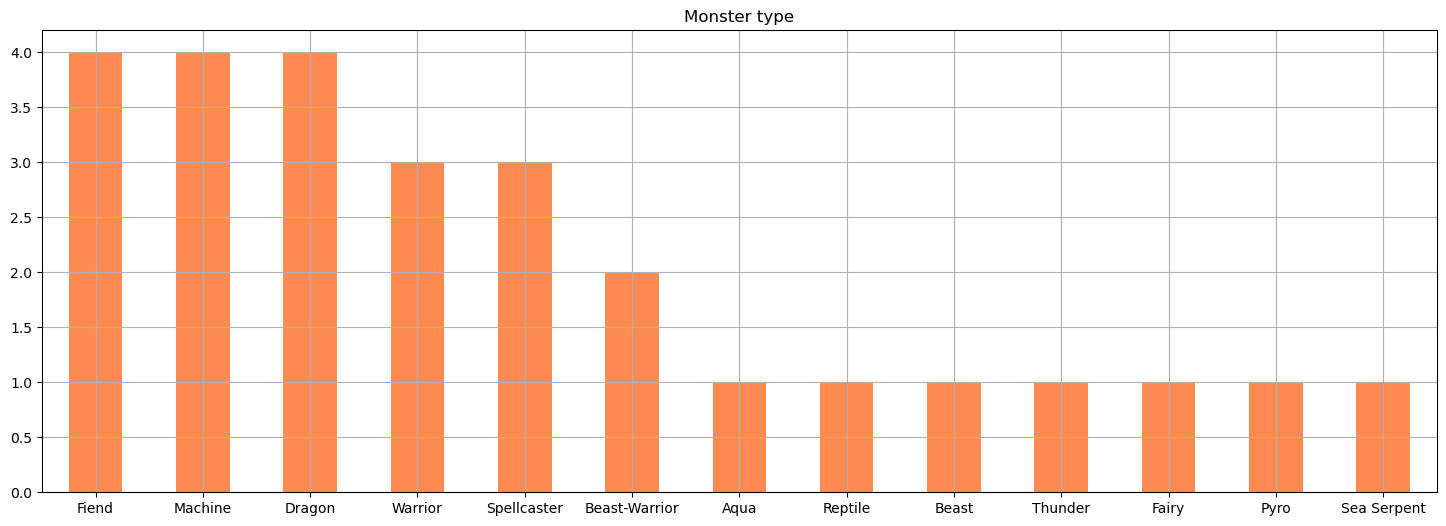

In [61]:
monster_type_colors = colors_dict['Monster Card']
rush_df[rush_df['Legend']]['Monster type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = monster_type_colors, title = 'Monster type')
plt.show()

## Artworks

In [62]:
print('Total number of cards with edited or alternate artworks:', rush_df['Artwork'].count())

Total number of cards with edited or alternate artworks:

50

In [63]:
rush_df[['Name','Artwork']].dropna()

,Name,Artwork
103,Bandijo of the Battle Ballad,"(Edited,)"
105,Barrel Dragon,"(Edited,)"
169,Blue-Eyes White Dragon,"(Alternate,)"
170,Blue-Tooth Burst Dragon,"(Alternate,)"
184,Bubble Kingdom,"(Edited,)"
201,CAN:D,"(Alternate,)"
203,CAN:D LIVE,"(Alternate,)"
212,Cat Claw Girl,"(Alternate,)"
223,Chemicalize Salamander,"(Alternate,)"
265,Constructor Wyrm Buildragon,"(Alternate,)"


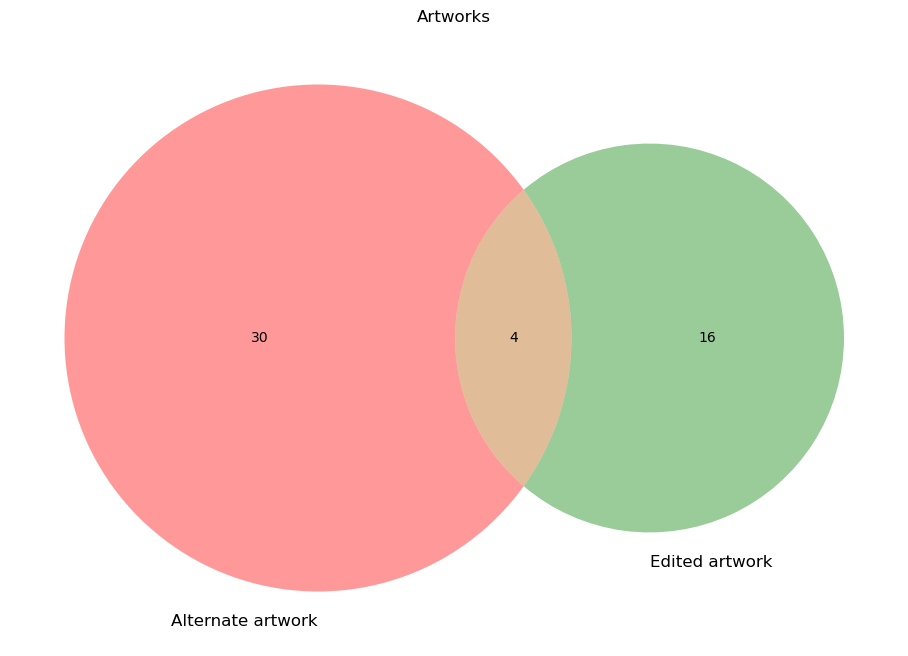

In [64]:
artwork_value_counts = rush_df['Artwork'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Artworks')
venn2(subsets = (artwork_value_counts[('Alternate',)], artwork_value_counts[('Edited',)],artwork_value_counts[('Alternate','Edited')]), set_labels = ('Alternate artwork', 'Edited artwork'))
plt.show()

### By card type

In [65]:
artwork_crosstab = pd.crosstab(rush_df['Artwork'], rush_df['Card type'])
artwork_crosstab

Card type,Monster Card,Spell Card,Trap Card
Artwork,,,
"(Alternate,)",25,4,1
"(Alternate, Edited)",4,0,0
"(Edited,)",12,3,1


### By primary type

In [66]:
artwork_crosstab_b = pd.crosstab(rush_df['Artwork'], rush_df['Primary type'])
artwork_crosstab_b

Primary type,Effect Monster,Fusion Monster,Normal Monster
Artwork,,,
"(Alternate,)",17,1,7
"(Alternate, Edited)",4,0,0
"(Edited,)",6,2,4


More granularity is unnecessary

## Errata

In [67]:
print('Total number of cards with errata:', rush_df['Errata'].count())

Total number of cards with errata:

153

In [68]:
rush_df[['Name','Errata']].dropna()

,Name,Errata
3,Abare Ushioni,"(Any,)"
5,Abyss Soldier,"(Any,)"
29,Alligator's Sword,"(Type,)"
30,Alligator's Sword Dragon,"(Any,)"
48,Ancient Rules,"(Any,)"
...,...,...
1373,Vorse Raider,"(Name, Type)"
1377,The Warrior Returning Alive,"(Type,)"
1379,Wasteland,"(Type,)"
1390,Widespread Ruin,"(Name,)"


### By card type

In [69]:
errata_crosstab = pd.crosstab(rush_df['Errata'], rush_df['Card type'])
errata_crosstab

Card type,Monster Card,Spell Card,Trap Card
Errata,,,
"(Any,)",38,19,14
"(Name,)",13,1,2
"(Name, Type)",10,1,0
"(Type,)",28,27,0


### By primary type

In [70]:
errata_crosstab_b = pd.crosstab(rush_df['Errata'], rush_df['Primary type'])
errata_crosstab_b

Primary type,Effect Monster,Fusion Monster,Normal Monster
Errata,,,
"(Any,)",26,2,10
"(Name,)",4,2,7
"(Name, Type)",0,2,8
"(Type,)",7,2,19


### By artwork

In [71]:
errata_crosstab_c = pd.crosstab(rush_df['Artwork'], rush_df['Errata'])
errata_crosstab_c

Errata,"(Any,)","(Name,)","(Name, Type)","(Type,)"
Artwork,,,,
"(Alternate,)",0,1,3,2
"(Alternate, Edited)",1,0,0,1
"(Edited,)",1,0,0,0


More granularity is unnecessary

# Epilogue

In [72]:
benchmark('rush',timestamp)

In [73]:
footer(timestamp)

<div align='right'>
    Execution completed 04/03/2023 00:57 UTC
</div>

## HTML export

In [74]:
# Save notebook on disck before generating HTML report
save_notebook()

Notebook saved to disk

In [75]:
! jupyter nbconvert Rush.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

[NbConvertApp] Converting notebook Rush.ipynb to HTML


[NbConvertApp] Writing 1693277 bytes to ../Rush.html


## Git

In [ ]:
! git add "../*[Rr]ush*"

In [ ]:
! git commit -m {"'Rush duel update-" + timestamp.isoformat() + "'"}